In [51]:
# -*- coding: utf-8 -*-
import sys 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
# import lightgbm as lgb
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
reload(sys) 
sys.setdefaultencoding('utf-8')

pd.options.display.max_columns = None
train_df = pd.read_csv('/Users/giggle/Downloads/train_dataset.csv')
test_df = pd.read_csv('/Users/giggle/Downloads/test_dataset.csv')
# train_df.info()

In [2]:
train_df.describe()

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,114.172400,0.052540,3.351920,48.054500,0.329500,26.572520,0.038700,0.027120,0.242280,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,304.063961,0.223116,1.241202,54.208524,0.470036,32.789251,0.192881,0.162435,0.428467,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,130.000000,0.000000,4.000000,61.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,49040.000000,1.000000,5.000000,1906.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


In [3]:
train_df.quantile([0.002, 0.001, 0.998, 0.999])

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0.002,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,8.09998,8.00000,10.00,0.0,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,468.998
0.001,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,8.00000,2.09997,10.00,0.0,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,460.000
0.998,1.0,81.0,1.0,1.0,1.0,266.0,1.0,499.0,390.09122,447.72504,1750.04,1.0,5.0,415.002,1.0,92.0,1.0,1.0,1.0,1.0,1.0,34749.180,119.000,17072.156,86569.144,73.002,64.002,1176.040,698.000
0.999,1.0,84.0,1.0,1.0,1.0,273.0,1.0,499.0,446.96013,573.25255,2610.03,1.0,5.0,536.003,1.0,92.0,1.0,1.0,1.0,1.0,1.0,49902.145,203.001,21885.030,110312.852,123.010,108.001,1814.027,703.000


In [52]:
def base_process(data):
    user_int_fea = ['用户年龄', '用户网龄（月）', '当月通话交往圈人数', '近三个月月均商场出现次数', '当月网购类应用使用次数',
                         '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数', '当月视频播放类应用使用次数', '当月飞机类应用使用次数',
                         '当月火车类应用使用次数', '当月旅游资讯类应用使用次数']
    
    call_cost_fea = ['缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）', '用户当月账户余额（元）']
    
    user_big_int_fea = ['当月网购类应用使用次数', '当月金融理财类应用使用总次数', '当月视频播放类应用使用次数']
    
    # 异常值截断
    for col in user_int_fea + call_cost_fea:
        high = np.percentile(data[col].values, 99.8)
        low = np.percentile(data[col].values, 0.2)
        data.loc[data[col] > high, col] = high
        data.loc[data[col] < low, col] = low
    
#     # 过大量级值取log平滑
    for col in user_big_int_fea:
        data[col] = data[col].map(lambda x: np.log1p(x))
    
    # 交通APP特征汇总
    data['交通APP次数'] = data['当月火车类应用使用次数'] + data['当月飞机类应用使用次数']
#     data = data.drop(columns=['当月火车类应用使用次数', '当月飞机类应用使用次数'])
    
    
    # 高档消费
    data['高档消费'] = data['当月是否逛过福州仓山万达'] + data['当月是否到过福州山姆会员店']
#     data = data.drop(columns=['当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店'])
    
    # 缴费金额
    data['充值方式'] = 0
    data['充值方式'][(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & 
                 data['缴费用户最近一次缴费金额（元）'] != 0] = 1
    
    data['缴费习惯'] = data['缴费用户最近一次缴费金额（元）'] / (data['用户近6个月平均消费值（元）'] + 1)
    
    # 当月话费/6月话费, 最近消费稳定性
    data['最近账单稳定性'] = data['用户账单当月总费用（元）'] / (data['用户近6个月平均消费值（元）'] + 1)
    
    # 当月话费/当月账户余额
    data['账户余额利用率'] = data['用户账单当月总费用（元）'] / (data['用户当月账户余额（元）'] + 1)
    
    # 当月欠费
#     data['当月欠费'] = 0
#     data['当月欠费'][(data['用户最近一次缴费距今时长（月）'] == 0) & (data['缴费用户当前是否欠费缴费'] == 1)] = 1
    
    # 根据年龄区分社会角色，不确定，<18，[18,  23），[23,  30)，[30，45），[45, +)
    data['不确定角色'] = 0
    data['不确定角色'][data['用户年龄'] == 0] = 1
    
    data['小学生'] = 0
    data['小学生'][(data['用户年龄'] > 0) & (data['用户年龄'] < 18) & (data['是否大学生客户'] == 0)] = 1
    
    data['大学生'] = 0
    data['大学生'][((data['用户年龄'] >= 18) & (data['用户年龄'] < 23)) | (data['是否大学生客户'] == 1)] = 1
    
    data['工作10年内'] = 0
    data['工作10年内'][((data['用户年龄'] >= 23) & (data['用户年龄'] < 30))] = 1
    
    data['工作10年上'] = 0
    data['工作10年上'][((data['用户年龄'] >= 30) & (data['用户年龄'] < 45))] = 1
    
    data['老干部'] = 0
    data['老干部'][(data['用户年龄'] >= 45)] = 1
#     data['社会角色'] = -1
#     data['社会角色'][data['用户年龄'] == 0]
#     data['社会角色'][((data['用户年龄'] > 0) & (data['用户年龄'] < 18)) & (data['是否大学生客户'] == 0)] = 1
#     data['社会角色'][((data['用户年龄'] >= 18) & (data['用户年龄'] < 23)) | (data['是否大学生客户'] == 1)] = 2
#     data['社会角色'][((data['用户年龄'] >= 23) & (data['用户年龄'] < 30))] = 3
#     data['社会角色'][((data['用户年龄'] >= 30) & (data['用户年龄'] < 45))] = 4
#     data['社会角色'][((data['用户年龄'] >= 45))] = 5
    data = data.drop(columns=['是否大学生客户'], axis=1)
    
    # 是否新互联网用户 用户网龄分段，<12，[12,  36)，[36,  120)，[120,  +)
    data['新用户'] = 0
    data['新用户'][(data['用户网龄（月）'] < 12)] = 1
    
    data['3年用户'] = 0
    data['3年用户'][(data['用户网龄（月）'] >= 12) & (data['用户网龄（月）'] < 36)] = 1
    
    data['10年用户'] = 0
    data['10年用户'][(data['用户网龄（月）'] >= 36) & (data['用户网龄（月）'] < 120)] = 1
    
    data['老用户'] = 0
    data['老用户'][(data['用户网龄（月）'] >= 120)] = 1

#     data['用户入网深度'] = 0
#     data['用户入网深度'][(data['用户网龄（月）'] >= 12) & (data['用户网龄（月）'] < 36)] = 1
#     data['用户入网深度'][(data['用户网龄（月）'] >= 36) & (data['用户网龄（月）'] < 120)] = 2
#     data['用户入网深度'][data['用户网龄（月）'] >= 120] = 3
#     data = data.drop(columns=['用户网龄（月）'])

    data = data.drop(columns=['用户编码'], axis=1)
    return data

# 特征处理
train_feature = base_process(train_df.drop(columns=['信用分'], axis=1))
test_feature = base_process(test_df)

# train data generate
train_label = train_df['信用分']
# x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2, random_state=10)
x_train = train_feature
y_train = train_label

In [6]:
train_feature.describe()

,用户实名制是否通过核实,用户年龄,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,交通APP次数,高档消费,充值方式,缴费习惯,最近账单稳定性,账户余额利用率,不确定角色,小学生,大学生,工作10年内,工作10年上,老干部,新用户,3年用户,10年用户,老用户
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,0.99022,37.866760,0.048800,0.088580,96.435120,0.700100,53.386182,98.533891,99.264511,110.090480,0.052540,3.351920,47.689204,0.329500,26.572520,0.038700,0.027120,0.242280,0.47442,0.37412,4.797941,0.587100,4.657834,5.158861,0.336704,0.402804,16.203100,0.739508,0.065820,0.02468,0.577887,1.003134,1.737431,0.005800,0.003300,0.044200,0.190580,0.507860,0.251960,0.069680,0.11832,0.459820,0.352180
std,0.09841,11.535827,0.215452,0.284139,59.129533,0.458218,61.500890,59.388890,62.936915,143.121542,0.223116,1.241202,50.086672,0.470036,32.789251,0.192881,0.162435,0.428467,0.49935,0.48390,2.759880,7.067473,2.917158,3.260089,4.110340,3.810080,78.465776,6.080551,0.281441,0.15515,0.724704,0.275617,2.174661,0.075937,0.057351,0.205541,0.392762,0.499943,0.434143,0.254609,0.32299,0.498388,0.477654
min,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,8.099980,8.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.044196,0.004569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.00000,30.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,2.944439,0.000000,1.945910,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.895463,0.638462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.00000,36.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.00000,5.525453,0.000000,5.590987,5.817111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.467861,0.982627,1.114754,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.00000,45.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,130.000000,0.000000,4.000000,61.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.00000,1.00000,6.838405,0.000000,7.045994,7.793277,0.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.859826,1.074664,1.963380,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.00000,81.000000,1.000000,1.000000,266.000000,1.000000,499.000000,390.091220,447.725040,1750.040000,1.000000,5.000000,415.002000,1.000000,92.000000,1.000000,1.000000,1.000000,1.00000,1.00000,10.455940,119.000000,9.745263,11.368710,73.002000,64.002000,1176.040000,137.004000,2.000000,1.00000,27.119565,5.809585,40.702276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


,用户实名制是否通过核实,用户年龄,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,交通APP次数,高档消费,充值方式,缴费习惯,最近账单稳定性,账户余额利用率,不确定角色,小学生,大学生,工作10年内,工作10年上,老干部,新用户,3年用户,10年用户,老用户
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,0.99022,37.866760,0.048800,0.088580,96.435120,0.700100,53.386182,98.533891,99.264511,110.090480,0.052540,3.351920,47.689204,0.329500,26.572520,0.038700,0.027120,0.242280,0.47442,0.37412,4.797941,0.587100,4.657834,5.158861,0.336704,0.402804,16.203100,0.739508,0.065820,0.02468,0.577887,1.003134,1.737431,0.005800,0.003300,0.044200,0.190580,0.507860,0.251960,0.069680,0.11832,0.459820,0.352180
std,0.09841,11.535827,0.215452,0.284139,59.129533,0.458218,61.500890,59.388890,62.936915,143.121542,0.223116,1.241202,50.086672,0.470036,32.789251,0.192881,0.162435,0.428467,0.49935,0.48390,2.759880,7.067473,2.917158,3.260089,4.110340,3.810080,78.465776,6.080551,0.281441,0.15515,0.724704,0.275617,2.174661,0.075937,0.057351,0.205541,0.392762,0.499943,0.434143,0.254609,0.32299,0.498388,0.477654
min,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,8.099980,8.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.044196,0.004569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.00000,30.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,2.944439,0.000000,1.945910,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.895463,0.638462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.00000,36.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.00000,5.525453,0.000000,5.590987,5.817111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.467861,0.982627,1.114754,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.00000,45.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,130.000000,0.000000,4.000000,61.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.00000,1.00000,6.838405,0.000000,7.045994,7.793277,0.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.859826,1.074664,1.963380,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.00000,81.000000,1.000000,1.000000,266.000000,1.000000,499.000000,390.091220,447.725040,1750.040000,1.000000,5.000000,415.002000,1.000000,92.000000,1.000000,1.000000,1.000000,1.00000,1.00000,10.455940,119.000000,9.745263,11.368710,73.002000,64.002000,1176.040000,137.004000,2.000000,1.00000,27.119565,5.809585,40.702276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
test_feature.describe()

,用户实名制是否通过核实,用户年龄,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,交通APP次数,高档消费,充值方式,缴费习惯,最近账单稳定性,账户余额利用率,社会角色,用户入网深度
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.992260,37.909340,0.048200,0.088800,96.087060,0.702740,53.993396,99.040291,99.568531,110.717840,0.051120,3.354040,47.924468,0.331940,26.441540,0.039760,0.026980,0.245320,0.476500,0.375340,1109.191180,0.48860,937.505944,3324.91956,0.318540,0.418840,16.300416,0.737380,0.066740,0.02570,0.580100,1.003167,1.733058,3.945840,2.088140
std,0.087637,11.527648,0.214191,0.284458,59.017443,0.457057,62.245142,59.630454,62.688452,145.570811,0.220245,1.241067,50.225589,0.470914,32.690192,0.195397,0.162027,0.430281,0.499452,0.484215,2990.181703,5.85512,1752.390090,8776.46518,3.847255,3.811334,78.256788,5.881417,0.283209,0.15824,0.705595,0.283240,2.169318,0.873294,0.865232
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,8.040000,8.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.043785,0.004345,-1.000000,0.000000
25%,1.000000,30.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.450000,53.200000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.00000,5.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.893653,0.637363,4.000000,2.000000
50%,1.000000,36.000000,0.000000,0.000000,94.000000,1.000000,49.900000,90.000000,90.000000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.000000,0.00000,263.000000,333.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.474583,0.983051,1.098765,4.000000,2.000000
75%,1.000000,45.000000,0.000000,0.000000,139.000000,1.000000,99.800000,132.000000,135.235000,130.000000,0.000000,4.000000,62.000000,1.000000,49.000000,0.000000,0.000000,0.000000,1.000000,1.000000,935.000000,0.00000,1144.000000,2455.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.868506,1.077189,1.949017,5.000000,3.000000
max,1.000000,82.000000,1.000000,1.000000,268.000000,1.000000,499.000000,389.980760,438.250360,1840.020000,1.000000,5.000000,405.004000,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36410.040000,98.00000,16785.082000,90207.45000,68.000000,62.000000,1155.008000,130.000000,2.000000,1.00000,22.545181,6.016742,39.840942,5.000000,3.000000


In [27]:
######################
# gbdt cross validation
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=2019)
kf = kfold.split(x_train, y_train)

# init var
cv_pred = np.zeros(test_feature.shape[0])
cv_score = 0
count = 0

model = None
for i, (train_fold, validate) in enumerate(kf):
    print('fold: ',i, ' training')
    X_train, X_val, Y_train, Y_val = \
    x_train.iloc[train_fold, :], x_train.iloc[validate, :], \
    y_train[train_fold], y_train[validate]
    
    # model train
    params = {'n_estimators': 1000, 'subsample': 0.9, 'learning_rate': 0.03, 'loss': 'lad', 'random_state':0, 
          'max_depth': 7, 'min_samples_split': 1060, 'min_samples_leaf': 120, 'max_features': 21}
    model = GradientBoostingRegressor(**params)
    model.fit(X_train, Y_train)
    
    # predict & score calculate
    cv_pred += model.predict(test_feature)
    cv_score += (1 / (mean_absolute_error(Y_val, model.predict(X_val)) + 1))

test_pred = cv_pred / NFOLDS
cv_score /= NFOLDS
print('gbdt score is: ', cv_score)

In [ ]:
######################
# xgboost cross validation
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=2019)
kf = kfold.split(x_train, y_train)

# init var
cv_pred = np.zeros(test_feature.shape[0])
cv_score = 0
count = 0

# model=None
for i, (train_index, val_index) in enumerate(kf):
    print('fold: ',i, ' training')
    X_train, X_val, Y_train, Y_val = x_train.iloc[train_index, :], x_train.iloc[val_index, :], \
    y_train[train_index], y_train[val_index]
    
    # train 
    params = {'learning_rate': 0.003, 'n_estimators': 8000, 'max_depth': 6, 'min_child_weight': 10, 'seed': 0,
            'subsample': 0.6, 'colsample_bytree': 0.5, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5, 'n_jobs':20}
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, Y_train, eval_metric=mean_absolute_error)
    
    # predict & score calculate
    cv_pred += model.predict(test_feature)
    cv_score += (1 / (mean_absolute_error(Y_val, model.predict(X_val)) + 1))

test_pred = cv_pred / NFOLDS
cv_score /= NFOLDS
print('xgb score is: ', cv_score)   

In [ ]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

#######################
# lgb model
params = {
    'objective': 'regression_l1',
    'learning_rate': 0.003,
    'boosting_type': 'gbdt',
    'metric': 'mae',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.6,
    'bagging_freq': 2,
    'num_leaves': 32,
    'min_data_in_leaf': 50,
    'max_bin': 511,
    'verbose': -1,
    'max_depth': 5,
    'lambda_l2': 5, 'lambda_l1': 0,
    'nthread': 20
}
x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2, random_state=10)
dtrain = lgb.Dataset(x_train, y_train)
dvalid = lgb.Dataset(x_val, y_val, reference=dtrain)
model = lgb.train(params, dtrain, num_boost_round=10000, valid_sets=dvalid, verbose_eval=-1, early_stopping_rounds=50)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('[%s]test mae: %.4f'%(datetime.datetime.now().strftime('%Y.%m.%d %H:%M:%S'), mae))
print('[%s]test score: %.4f'%(datetime.datetime.now().strftime('%Y.%m.%d %H:%M:%S'), 1/(1+mae)))
    
# cv_pred = np.zeros(test_data.shape[0])
# valid_best_l2_all = 0

# feature_importance_df = pd.DataFrame()
# count = 0
# for i, (train_fold, validate) in enumerate(kf):
#     print('fold: ',i, ' training')
#     X_train, X_validate, label_train, label_validate = \
#     train_data_use.iloc[train_fold, :], train_data_use.iloc[validate, :], \
#     train_label[train_fold], train_label[validate]
#     dtrain = lgb.Dataset(X_train, label_train)
#     dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain)
#     bst = lgb.train(params, dtrain, num_boost_round=10000, valid_sets=dvalid, verbose_eval=-1,early_stopping_rounds=50)
#     cv_pred += bst.predict(test_data_use, num_iteration=bst.best_iteration)
#     valid_best_l2_all += bst.best_score['valid_0']['l1']

#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["feature"] = list(X_train.columns)
#     fold_importance_df["importance"] = bst.feature_importance(importance_type='gain', iteration=bst.best_iteration)
#     fold_importance_df["fold"] = count + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
#     count += 1

# cv_pred /= NFOLDS
# valid_best_l2_all /= NFOLDS
# print('cv score for valid is: ', 1/(1+valid_best_l2_all))


In [32]:
res = pd.concat([test_df['用户编码'], pd.DataFrame(map(int, test_pred))], axis=1)
res.columns = ['id', 'score']
res.to_csv(r'/Users/giggle/Downloads/result_xgb_cv.csv', columns=['id', 'score'], 
           index=False, sep=',')


In [15]:
# model train
# Ridge
# model = linear_model.Ridge(alpha=.5)
# model.fit(x_train, y_train)

# GBRT
# ********** cross validation
# param_test1 = {'max_features':np.arange(7, 40, 2)}
# model = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=190, random_state=0,
#                                                          min_samples_leaf=120, min_samples_split=1060,
#                                                          max_depth=7),
#                      param_grid=param_test1, scoring='neg_mean_absolute_error', iid=False, cv=5)
# model.fit(x_train, y_train)
# print model.cv_results_, model.best_params_, model.best_score_
# for indx, one in enumerate(optimized_GBM.cv_results_['params']):
#     print one, model.cv_results_['mean_test_score'][indx], model.cv_results_['std_test_score'][indx]
# print model.best_score_

x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2, random_state=10)
params = {'n_estimators': 800, 'subsample': 0.9, 'learning_rate': 0.03, 'loss': 'ls', 'random_state':0, 
          'max_depth': 7, 'min_samples_split': 1060, 'min_samples_leaf': 120, 'max_features': 21}
model = GradientBoostingRegressor(**params)
model.fit(x_train, y_train)

# predict
train_score = (1 / (mean_absolute_error(y_train, model.predict(x_train)) + 1))
print 'train score = ', train_score

test_score = (1 / (mean_absolute_error(y_val, model.predict(x_val)) + 1))
print 'test score = ', test_score

In [55]:
############################
# xgb model train
x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2, random_state=10)

params = {'learning_rate': 0.003, 'n_estimators': 8000, 'max_depth': 6, 'min_child_weight': 10, 'seed': 0,
            'subsample': 0.7, 'colsample_bytree': 0.5, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5, 'n_jobs':20}
model = xgb.XGBRegressor(**params)
model.fit(x_train, y_train, eval_metric=mean_absolute_error)

valdata = xgb.DMatrix(x_val.values, label=y_val.values)
# model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric=mean_absolute_error, eval_set=[(x_val, y_val)])

# predict
train_score = (1 / (mean_absolute_error(y_train, model.predict(x_train)) + 1))
print 'train score = ', train_score

test_score = (1 / (mean_absolute_error(y_val, model.predict(x_val)) + 1))
print 'test score = ', test_score

In [ ]:
############################
# 预测结果融合平均
lgb = pd.read_csv('/Users/giggle/Downloads/result.lgb&xgb')
xgb = pd.read_csv('/Users/giggle/Downloads/result_xgb_cv.csv')
lgb.columns = ['id', 'score1']
xgb.columns = ['id', 'score2']
result = lgb.set_index('id').join(xgb.set_index('id'))
result['id'] = result.index

result['score'] = np.floor(((result['score1'] + result['score2']) / 2)).map(lambda x: np.int(x))
result = result.drop(columns=['score1', 'score2'])
result.to_csv(r'/Users/giggle/Downloads/result_xgb_lgb.csv', columns=['id', 'score'], 
           index=False, sep=',')

In [ ]:
# #############################################################################
# Plot training deviance
test_score = (1 / (mean_absolute_error(y_val, model.predict(x_val)) + 1))
print 'test score = ', test_score
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(x_val)):
    test_score[i] = model.loss_(y_val, y_pred)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

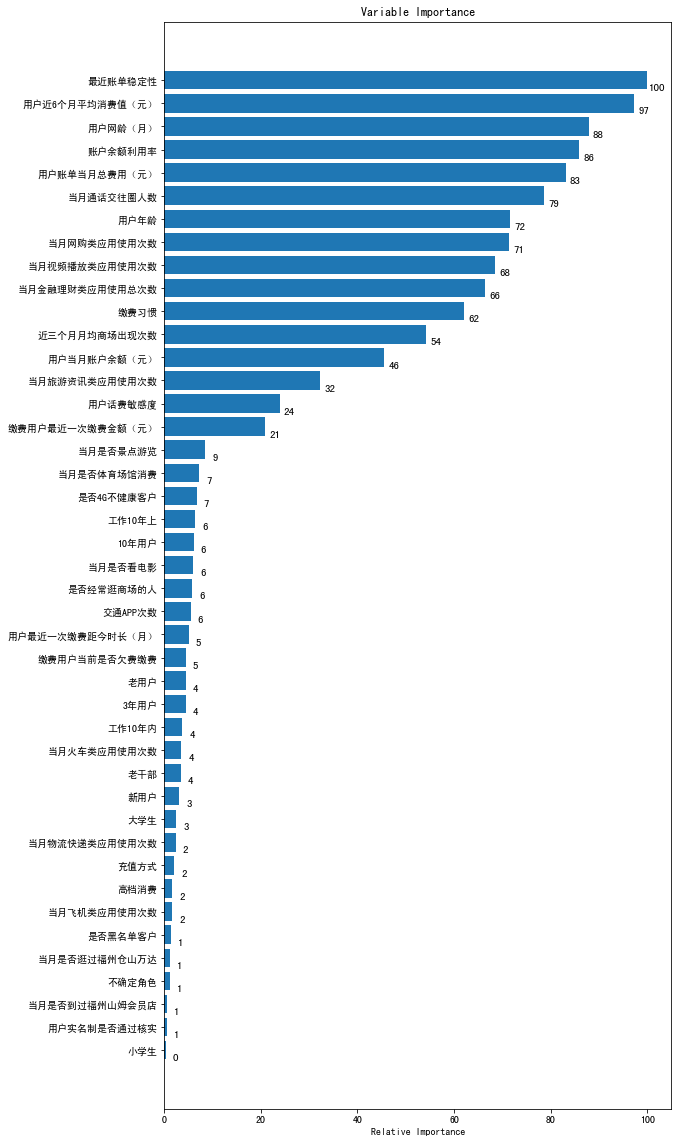

In [34]:
# #############################################################################
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False

# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print type(sorted_idx)
print sorted_idx
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_feature.columns.map(lambda x: x.decode())[sorted_idx])
for i,v in enumerate(sorted_idx):  
    plt.text(feature_importance[v] + 2, i, '%.0f' % (feature_importance[v]), ha='center', va= 'bottom',fontsize=11)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus']=False

#############################
# 特征与‘信用分’相关系数
x_cols = [col for col in train_df.columns if col not in ['信用分'] if train_df[col].dtype != 'object']
labels = []
values = []
for col in x_cols:
    labels.append(col.decode())
    values.append(np.corrcoef(train_df[col].values, train_df['信用分'].values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

#plot
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,40))
ax.barh(ind, np.array(corr_df.corr_values.values), color='green')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel(u'Correlation coefficient')
ax.set_title(u'Credit coefficient')

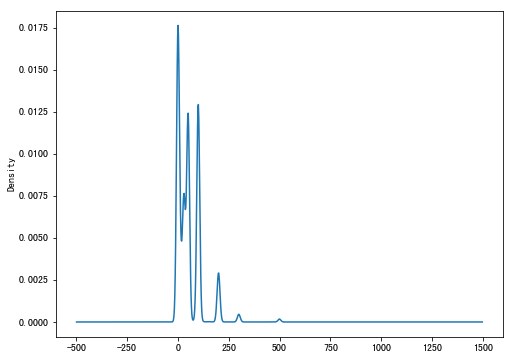

In [82]:
####################################
# 特征值分布
plt.figure(figsize=(8,6))
train_df['缴费用户最近一次缴费金额（元）'].plot(kind='kde')
plt.show()

In [ ]:
# ###########################
# 特征分段与‘信用分’分布
train_df[train_df['当月火车类应用使用次数'] > 7].loc[:, ['信用分']].describe()
train_df[train_df['当月火车类应用使用次数'] <= 7].loc[:, ['信用分']].describe()

In [ ]:
import matplotlib

from matplotlib.font_manager import fontManager 
import matplotlib.pyplot as plt 
import os 
import os.path 

#######################################
# jupyter note chinese support
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
#subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
plt.subplots_adjust(0.04, 0.04, 0.99, 0.95, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 

#查看系统中所有可用的中文字体
fonts = [font.name for font in fontManager.ttflist if os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, font+":"+u"中文C", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
ax.set_xlabel(u'横坐标',{'fontname':'STKaiti'})
ax.set_ylabel(u'纵坐标',{'fontname':'STHupo','fontsize':20})
matplotlib.matplotlib_fname()
from matplotlib.font_manager import findfont, FontProperties
findfont(FontProperties(family=FontProperties().get_family()))
matplotlib.font_manager.FontProperties().get_family()